# <center>IST-718 Final Project</center>
# <center>In-Game Assessment Scoring Engine</center>

### Prepared By 
#### Jagannathan Govindan <br> Jason Min-Liang Kang <br> Ram Krishnan <br> Steve DeVito 

## Introduction

PBS Kids is the brand for most of the children's programming aired by the Public Broadcasting Service (PBS) in the United States. PBS produces curriculum-based entertainment for children. PBS KIDS leverages the full spectrum of media and technology to build knowledge, critical thinking, imagination and curiosity. By involving parents, teachers, caregivers and communities as learning partners, PBS KIDS helps to empower children for success in school and in life.


## Analysis and Models

### About the Data

In [2]:
import pandas as pd
import numpy as np
import json as js
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
import json
import glob
import os
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots
import plotly.express as px
from time import time
import datetime
from plotly.offline import  init_notebook_mode
import random
from catboost import CatBoostClassifier
# Import the XGBoost Classifier
from xgboost import XGBClassifier
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels # unique
sns.set(rc={'figure.figsize':(11.7,8.27)})
init_notebook_mode(connected=True)

In [3]:
directory="C:\\Users\\rkrishnan\\Documents\\01 Personal\\MS\\IST 718\\Project\\data-science-bowl-2019\\"

In [4]:
df_train_final_batch1= pd.read_pickle('df_train_final_batch1.pkl')
df_train_final_batch2= pd.read_pickle('df_train_final_batch2.pkl')
df_train_final_batch3= pd.read_pickle('df_train_final_batch3.pkl')

In [5]:
df_train_final_batch1.shape

(232366, 158)

In [6]:
df_train_final_batch1=df_train_final_batch1.loc[:,~df_train_final_batch1.columns.duplicated()]
df_train_final_batch1.shape

(232366, 155)

In [7]:
df_train_final_batch2.shape

(218579, 152)

In [8]:
df_train_final_batch2=df_train_final_batch2.loc[:,~df_train_final_batch2.columns.duplicated()]
df_train_final_batch2.shape

(218579, 149)

In [9]:
df_train_final_batch3.shape

(414502, 152)

In [10]:
df_train_final_batch3=df_train_final_batch3.loc[:,~df_train_final_batch3.columns.duplicated()]
df_train_final_batch3.shape

(414502, 149)

In [11]:
df_train_final = pd.concat([df_train_final_batch1,df_train_final_batch2,df_train_final_batch3],ignore_index=True, sort=False)

In [12]:
df_train_final=df_train_final[['event_id',
 'game_session',
 'timestamp',
 'installation_id',
 'event_count',
 'event_code',
 'game_time',
 'title',
 'type',
 'world',
 'version',
 'description',
 'identifier',
 'media_type',
 'total_duration',
 'coordinates.x',
 'coordinates.y',
 'coordinates.stage_width',
 'coordinates.stage_height',
 'duration',
 'size',
 'sand',
 'filled',
 'castles_placed',
 'molds',
 'level',
 'round',
 'movie_id',
 'time_played',
 'options',
 'animals',
 'round_target.size',
 'round_target.type',
 'round_target.animal',
 'item_type',
 'position',
 'animal',
 'correct',
 'misses',
 'houses',
 'dinosaurs',
 'dinosaur',
 'dinosaurs_placed',
 'house.size',
 'house.position',
 'rocket',
 'height',
 'launched',
 'flowers',
 'flower',
 'growth',
 'stumps',
 'source',
 'destination',
 'session_duration',
 'exit_type',
 'distance',
 'target_distances',
 'round_prompt',
 'target_size',
 'resources',
 'object_type',
 'group',
 'bug',
 'buglength',
 'stage_number',
 'hat',
 'caterpillar',
 'hats',
 'caterpillars',
 'bird_height',
 'cloud',
 'cloud_size',
 'water_level',
 'holding_shell',
 'has_water',
 'shells',
 'holes',
 'shell_size',
 'hole_position',
 'target_containers',
 'container_type',
 'containers',
 'current_containers',
 'total_containers',
 'toy_earned',
 'object',
 'previous_jars',
 'bottles',
 'bottle.amount',
 'bottle.color',
 'jar',
 'jar_filled',
 'tutorial_step',
 'hats_placed',
 'toy',
 'diet',
 'target_weight',
 'weight',
 'scale_weight',
 'scale_contents',
 'target_water_level',
 'buckets',
 'target_bucket',
 'mode',
 'prompt',
 'round_number',
 'bucket',
 'buckets_placed',
 'cauldron',
 'layout.left.chickens',
 'layout.left.pig',
 'layout.right.chickens',
 'layout.right.pig',
 'side',
 'table_weights',
 'starting_weights',
 'tape_length',
 'bug_length',
 'dwell_time',
 'total_bowls',
 'bowls',
 'has_toy',
 'bowl_id',
 'crystals',
 'crystal_id',
 'left',
 'right',
 'location',
 'scale_weights',
 'weights',
 'layout.row1',
 'layout.row2',
 'nest',
 'pillars',
 'max_position',
 'end_position',
 'gate.row',
 'gate.column',
 'gate.side',
 'dinosaur_weight',
 'dinosaur_count',
 'chests',
'num_correct_y',
 'num_incorrect_y',
 'accuracy_y',
 'accuracy_group_y']]

In [13]:
df_train_final[df_train_final.installation_id=='0006a69f']

,event_id,game_session,timestamp,installation_id,event_count,event_code,game_time,title,type,world,...,gate.row,gate.column,gate.side,dinosaur_weight,dinosaur_count,chests,num_correct_y,num_incorrect_y,accuracy_y,accuracy_group_y
0,3bfd1a65,901acc108f55a5a1,2019-08-06T05:22:01.344Z,0006a69f,1.0,2000.0,0.0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,3.0
1,db02c830,901acc108f55a5a1,2019-08-06T05:22:01.400Z,0006a69f,2.0,2025.0,37.0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,3.0
2,a1e4395d,901acc108f55a5a1,2019-08-06T05:22:01.403Z,0006a69f,3.0,3010.0,37.0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,3.0
3,a52b92d5,901acc108f55a5a1,2019-08-06T05:22:05.242Z,0006a69f,4.0,3110.0,3901.0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,3.0
4,a1e4395d,901acc108f55a5a1,2019-08-06T05:22:05.244Z,0006a69f,5.0,3010.0,3901.0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,8fee50e2,a9ef3ecb3d1acc6a,2019-08-06T20:50:30.601Z,0006a69f,28.0,4020.0,31551.0,Bird Measurer (Assessment),Assessment,TREETOPCITY,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,3.0
240,a16a373e,a9ef3ecb3d1acc6a,2019-08-06T20:50:32.888Z,0006a69f,29.0,4070.0,33818.0,Bird Measurer (Assessment),Assessment,TREETOPCITY,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,3.0
241,070a5291,a9ef3ecb3d1acc6a,2019-08-06T20:50:33.283Z,0006a69f,30.0,4100.0,34209.0,Bird Measurer (Assessment),Assessment,TREETOPCITY,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,3.0
242,f6947f54,a9ef3ecb3d1acc6a,2019-08-06T20:50:33.289Z,0006a69f,31.0,2030.0,34209.0,Bird Measurer (Assessment),Assessment,TREETOPCITY,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,3.0


In [14]:
print(f'Number of rows and columns in df_train_final is :{df_train_final.shape}')

Number of rows and columns in df_train_final is :(865447, 147)


In [15]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

In [16]:
def desc_wide(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count()*100)
    result = pd.concat([total, percent], axis=1, keys=['total', 'percentage'])
    result['types'] = list(df.dtypes)
    return(np.transpose(result))
def desc_long(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count()*100)
    result = pd.concat([total, percent], axis=1, keys=['total', 'percentage'])
    result['types'] = list(df.dtypes)
    return result

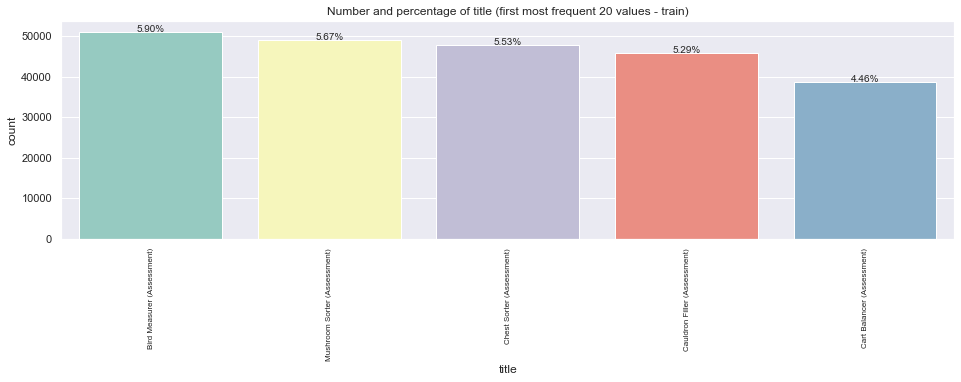

In [17]:
plot_count('title', 'title (first most frequent 20 values - train)', df_train_final, size=4)

In [18]:
train_label_file='train_labels.csv'
train_label=pd.read_csv(train_label_file)
train_label.shape

(17690, 7)

In [19]:
temp_df = train_label.accuracy_group.value_counts(normalize = True) *100
temp_df = temp_df.round(2)
text = [str(x) + "%" for x in temp_df.values]
fig = go.Figure(data = go.Bar(x = temp_df.index,y = temp_df.values, text = text,textposition='auto'))
fig.update_traces(marker_color='#D95219', marker_line_color='#D95219',marker_line_width=1.5, opacity=0.6)
fig.update_layout(title={'text': "Percentage of accuracy group",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'} )
fig.show()

In [35]:
temp_df = df_train_final['world'].value_counts(normalize = True) * 100
temp_df = temp_df.round(2)
text = [str(x) + "%" for x in temp_df.values]
fig = go.Figure(data = go.Bar(x = temp_df.values,y = temp_df.index, text = text,textposition='auto',orientation='h'))
fig.update_traces(marker_color='#611F8D', marker_line_color='#611F8D',marker_line_width=1.5, opacity=0.6)
fig.update_layout(title={'text': "Percentage of World",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'} )
fig.show(title = "Percentage of world")

In [40]:
df_train_final['title'].unique()

array(['Mushroom Sorter (Assessment)', 'Bird Measurer (Assessment)',
       'Cauldron Filler (Assessment)', 'Cart Balancer (Assessment)',
       'Chest Sorter (Assessment)', nan], dtype=object)

In [43]:
temp_df = df_train_final.groupby('world')['title'].value_counts(normalize = True).reset_index(name="percentage")
temp_df['percentage'] = temp_df['percentage'] *100
temp_df = temp_df.round(2)
data = []
type_ = temp_df['title'].unique()
colors = [x.replace(")","").replace("rgb(","") for x in cl.scales['5']['qual']['Paired']]
count = 0
for i in type_:

    text = [str(x) + "%" for x in temp_df[temp_df['title'] == i]['percentage'].values]
    data.append(go.Bar(name = i, x =temp_df[temp_df['title'] == i]['world'].values,text = text,textposition='auto',
                      y =  temp_df[temp_df['title'] == i]['percentage'].values,marker=dict(
        color='rgba(' + colors[count] + ',0.6)',
        line=dict(color='rgba(' + colors[count] + ',1.0)', width=1)
    )))
    count = count + 1
fig = go.Figure(data=data)
fig.update_layout(barmode='stack')
fig.update_layout(title={'text': "Percentage of titles in each world",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'} )
fig.show()

In [38]:
df_train_final['timestamp'] = pd.to_datetime(df_train_final.timestamp)
df_train_final['date'] = df_train_final['timestamp'].dt.date
df_train_final['month'] = df_train_final['timestamp'].dt.month_name()
df_train_final['weekday_name'] = df_train_final['timestamp'].dt.weekday_name
df_train_final['hour'] = df_train_final['timestamp'].dt.hour
df_train_final['minute'] = df_train_final['timestamp'].dt.minute

In [44]:
date_df = df_train_final.groupby("date")['event_id'].count()
month_df = df_train_final.groupby("month")['event_id'].count().reset_index(name="count")
month_df['month'] = pd.Categorical(month_df['month'],categories=['December','November','October','September','August','July','June','May','April','March','February','January'],ordered=True)
month_df = month_df.sort_values('month',ascending=False)

weekday_df = df_train_final.groupby("weekday_name")['event_id'].count().reset_index(name="count")
weekday_df['weekday'] = pd.Categorical(weekday_df['weekday_name'],categories=['Saturday','Friday','Thursday','Wednesday','Tuesday','Monday','Sunday'],ordered=True)
weekday_df = weekday_df.sort_values('weekday',ascending=False)

hour_df = df_train_final.groupby("hour")['event_id'].count()
minute_df = df_train_final.groupby("minute")['event_id'].count()
fig = make_subplots(rows = 5,cols = 1)

installation_df = df_train_final.groupby("date")['installation_id'].count()
fig.append_trace(go.Scatter(x = minute_df.index, y = minute_df.values, mode = "lines", name = "Minute"),row=1,col=1)
fig.append_trace(go.Scatter(x = hour_df.index, y = hour_df.values, mode = "markers", name = "Hour"),row=2,col=1)
fig.append_trace(go.Scatter(x = weekday_df['weekday'], y = weekday_df['count'], mode = "lines+markers", name = "Week Day"),row=3,col=1)
fig.append_trace(go.Scatter(x = date_df.index, y = date_df.values, mode = "lines+markers", name = "Date"),row=4,col=1)
fig.append_trace(go.Scatter(x = month_df['month'], y = month_df['count'], mode = "lines", name = "Month"),row=5,col=1)

fig.update_layout(height=1000)
fig.show()

In [47]:
temp_df = df_train_final.groupby('title')['accuracy_group_y'].value_counts(normalize=True).reset_index(name="percentage")
temp_df['percentage'] = temp_df['percentage']*100
temp_df = temp_df.round(2)
temp_df['title'] = temp_df['title'].str.replace("\(Assessment\)","")
colors = [x.replace(")","").replace("rgb(","") for x in cl.scales['4']['qual']['Dark2']]
data = []
for i in range(4):
    text = [str(x) + "%" for x in temp_df[temp_df['accuracy_group_y'] == i]['percentage'].values]
    data.append(go.Bar(name = i, x = temp_df[temp_df['accuracy_group_y'] == i]['title'].values,
                       text = text,textposition='auto',
                      y = temp_df[temp_df['accuracy_group_y'] == i]['percentage'].values,marker=dict(
        color='rgba(' + colors[i] + ',0.6)',
        line=dict(color='rgba(' + colors[i] + ',1.0)', width=1)
    )))
fig = go.Figure(data=data)
fig.update_layout(barmode='stack', title={'text': "Percentage of accuracy group for different type of Assessment",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [48]:
temp_df =  df_train_final['title'].value_counts()
data = go.Bar(x = temp_df.index,y = temp_df.values,text = temp_df.values,  textposition='auto')
fig = go.Figure(data = data)
fig.update_traces(marker_color='#C5197D', marker_line_color='#8E0052',marker_line_width=1.5, opacity=0.6)
fig.update_layout(barmode='stack', title={'text': "Different typess of Assessment",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

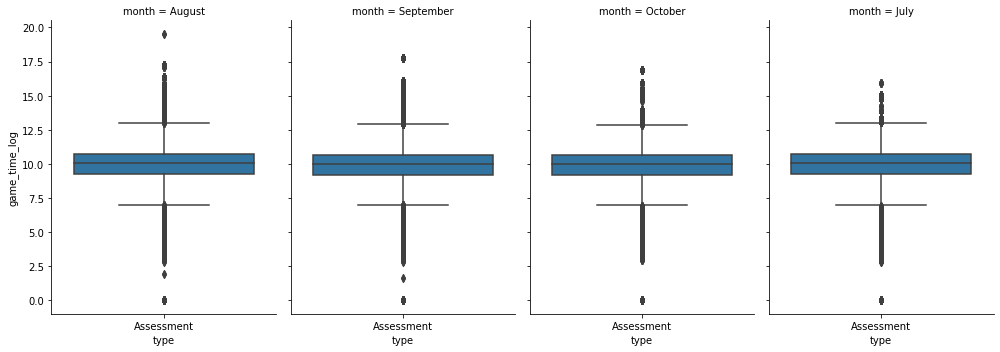

In [49]:
df_train_final['game_time_log'] = df_train_final['game_time'].apply(np.log1p)
#train_df = train_df.head(1000000)
# fig = px.box(train_df, y="game_time_log",x = "type",color='month',title={'text': "Distribution of game_time by type based on month",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
#              color_discrete_sequence=cl.scales['3']['qual']['Dark2'])
# fig.show()
ax = sns.catplot(x="type", y="game_time_log", data=df_train_final,col="month",kind="box", aspect=.7)

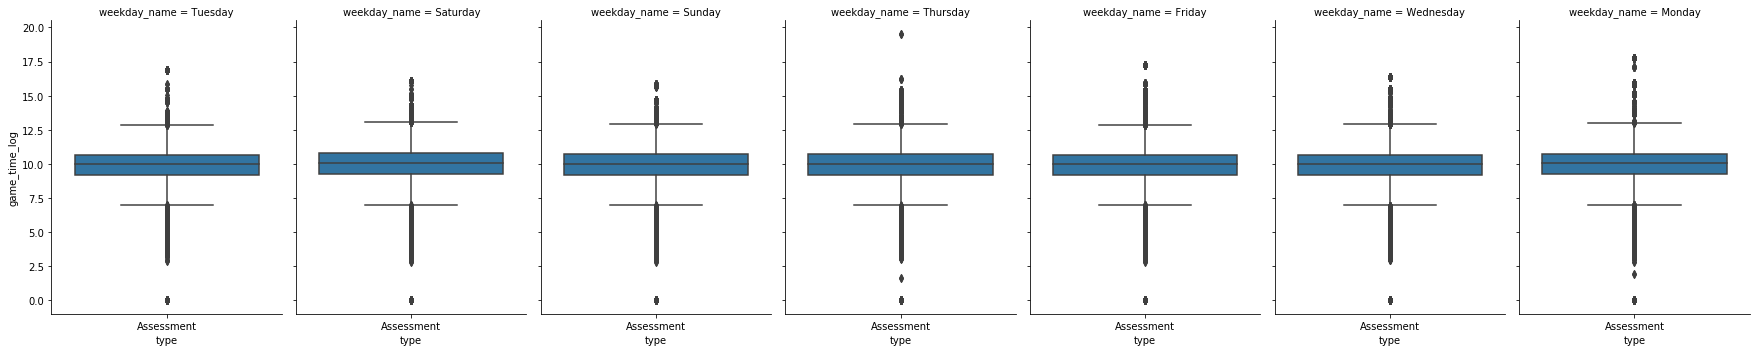

In [50]:
# fig = px.box(train_df, y="game_time_log",x = "type",color='weekday_name',title={'text': "Distribution of game_time by type based on weekday",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
#              color_discrete_sequence=cl.scales['3']['qual']['Dark2'])
# fig.show()
ax = sns.catplot(x="type", y="game_time_log", data=df_train_final,col="weekday_name",kind="box", aspect=.7)

<Figure size 1152x432 with 0 Axes>

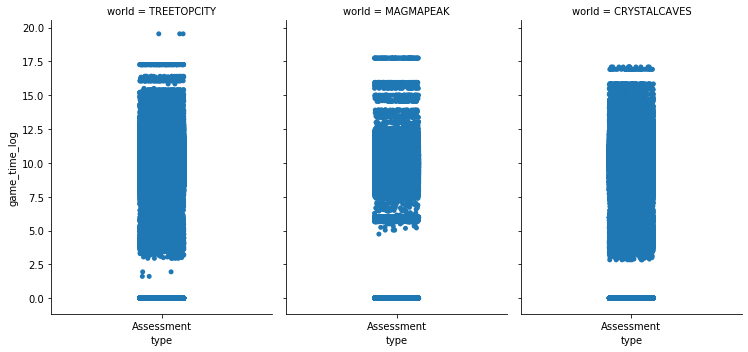

In [51]:
# fig = px.box(train_df, y="game_time_log",x = "type",color='world',title={'text': "Distribution of game_time by type based on world",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
#              color_discrete_sequence=cl.scales['3']['qual']['Dark2'])
# fig.show()
plt.figure(figsize=(16, 6))

ax = sns.catplot(x="type", y="game_time_log", data=df_train_final,col="world",kind="strip", aspect=.7)

<Figure size 1152x432 with 0 Axes>

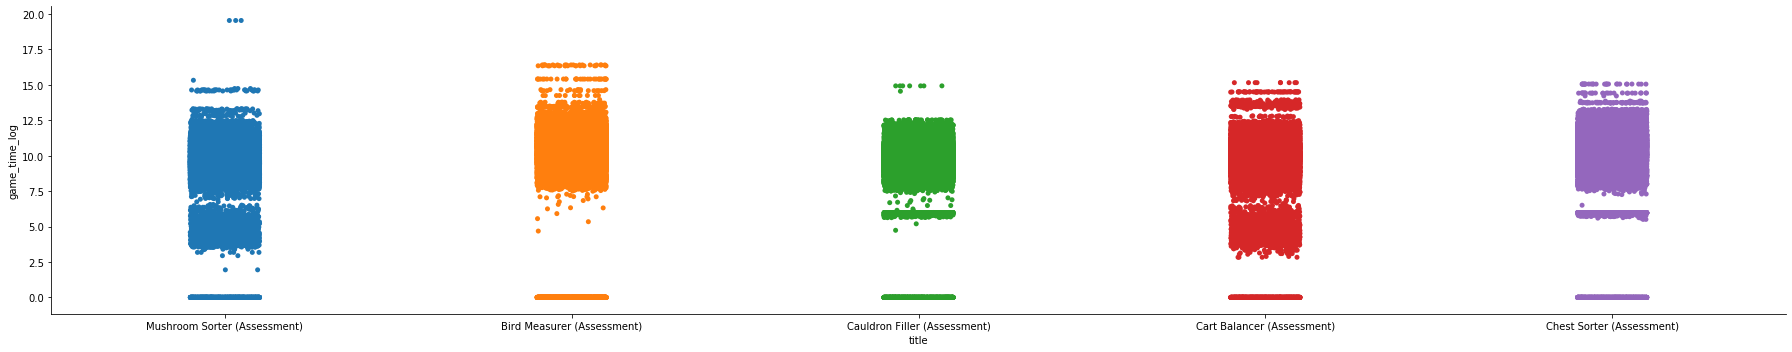

In [54]:
# fig = px.strip(train_df, y="game_time_log",x = "world",title={'text': "Distribution of game_time by world",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
#              color_discrete_sequence=cl.scales['3']['qual']['Dark2'])
# fig.show()
plt.figure(figsize=(16, 6))
ax = sns.catplot(x="title", y="game_time_log", data=df_train_final,kind="strip", aspect=5)

In [71]:
incorrect = df_train_final.groupby(['title','accuracy_group_y'])['num_incorrect_y'].value_counts().reset_index(name="count")
incorrect.title=incorrect.title.str.split("(", n = 1, expand = True)[0]
correct = df_train_final.groupby(['title','accuracy_group_y'])['num_correct_y'].value_counts().reset_index(name="count")
correct.title=correct.title.str.split("(", n = 1, expand = True)[0]

In [72]:
px.scatter(incorrect, x="accuracy_group_y", y="count",color = "num_incorrect_y",size = "count",
           hover_name="accuracy_group_y",facet_col="title",title="Incorrect answers on all titles")

In [74]:
px.scatter(correct, x="accuracy_group_y", y="count",color = "num_correct_y",size = "count",
           hover_name="accuracy_group_y",facet_col="title",title="Correct answers on all titles")

In [78]:
game_grp = df_train_final.groupby(['title','accuracy_group_y'])['installation_id'].count().reset_index()
display(game_grp)

,title,accuracy_group_y,installation_id
0,Bird Measurer (Assessment),0.0,14679
1,Bird Measurer (Assessment),1.0,21047
2,Bird Measurer (Assessment),2.0,5573
3,Bird Measurer (Assessment),3.0,9782
4,Cart Balancer (Assessment),0.0,9254
5,Cart Balancer (Assessment),1.0,6279
6,Cart Balancer (Assessment),2.0,4989
7,Cart Balancer (Assessment),3.0,18041
8,Cauldron Filler (Assessment),0.0,4124
9,Cauldron Filler (Assessment),1.0,9357


In [79]:
# Plotting with Sunburst Chart
# Manually created this list from the above table data.
fig =go.Figure(go.Sunburst(
    ids = ['Bird Measurer (Assessment)',"BM0","BM1","BM2","BM3",'Cart Balancer (Assessment)',"CB0","CB1","CB2","CB3",'Cauldron Filler (Assessment)',"CF0","CF1","CF2","CF3",'Chest Sorter (Assessment)',"CS0","CS1","CS2","CS3",'Mushroom Sorter (Assessment)', "MS0", "MS1", "MS2", "MS3"],
    labels=['Bird Measurer ',"0","1","2","3",'Cart Balancer ',"0","1","2","3",'Cauldron Filler ',"0","1","2","3", 'Chest Sorter ',"0","1","2","3", 'Mushroom Sorter ', "0", "1", "2", "3"],
    parents=["", "Bird Measurer (Assessment)", 'Bird Measurer (Assessment)', 'Bird Measurer (Assessment)', 'Bird Measurer (Assessment)',"", 'Cart Balancer (Assessment)', 'Cart Balancer (Assessment)', 'Cart Balancer (Assessment)', 'Cart Balancer (Assessment)',"", 'Cauldron Filler (Assessment)', 'Cauldron Filler (Assessment)', 'Cauldron Filler (Assessment)', 'Cauldron Filler (Assessment)',"", 'Chest Sorter (Assessment)', 'Chest Sorter (Assessment)', 'Chest Sorter (Assessment)', 'Chest Sorter (Assessment)', "",'Mushroom Sorter (Assessment)', 'Mushroom Sorter (Assessment)', 'Mushroom Sorter (Assessment)', 'Mushroom Sorter (Assessment)'],
    values=[51081,14679, 21047, 5573, 9782, 38563,9254, 6279, 4989, 18041, 45778,4124, 9357, 8666, 23631, 47876,27931, 11012, 3461, 5472, 49068, 9847, 6287, 7922, 25012],
    branchvalues="total",
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

## Models

In [89]:
test_file='test.csv'
df_test=pd.read_csv(test_file)
print(df_test.shape)
df_test.head()
train_file='train.csv'
df_train = pd.read_csv(train_file)

(1156414, 11)


In [82]:
def qwk(act,pred,n=4,hist_range=(0,3)):
    
    O = confusion_matrix(act,pred)
    O = np.divide(O,np.sum(O))
    
    W = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            W[i][j] = ((i-j)**2)/((n-1)**2)
            
    act_hist = np.histogram(act,bins=n,range=hist_range)[0]
    prd_hist = np.histogram(pred,bins=n,range=hist_range)[0]
    
    E = np.outer(act_hist,prd_hist)
    E = np.divide(E,np.sum(E))
    
    num = np.sum(np.multiply(W,O))
    den = np.sum(np.multiply(W,E))
        
    return 1-np.divide(num,den)

In [90]:
list_of_user_activities = list(set(df_train['title'].unique()).union(set(df_test['title'].unique())))
activities_map = dict(zip(list_of_user_activities, np.arange(len(list_of_user_activities))))

df_train['title'] = df_train['title'].map(activities_map)
df_test['title'] = df_test['title'].map(activities_map)
train_label['title'] = train_label['title'].map(activities_map)

win_code = dict(zip(activities_map.values(), (4100*np.ones(len(activities_map))).astype('int')))
win_code[activities_map['Bird Measurer (Assessment)']] = 4110

df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'])

In [98]:
############### Function to plot confusion matrix begins here ######################

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
#    if normalize:
#        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#        print("Normalized confusion matrix")
#    else:
    print('Confusion matrix, without normalization')

    print(cm)
    plt.rcParams["figure.figsize"] = (20,10)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    # fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            # ax.text(i, j, format(cm[i, j], fmt),
            ax.text(i, j, ("\n\n"+str(cm[i, j])) if j==0 else (str(cm[i, j])+"\n"),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "red")
    fig.tight_layout()
    return ax
############### Function to plot confusion matrix ends here ######################

In [84]:
def get_data(user_sample, test_set=False):
    last_activity = 0
    user_activities_count = {'Clip':0, 'Activity': 0, 'Assessment': 0, 'Game':0}
    accuracy_groups = {0:0, 1:0, 2:0, 3:0}
    all_assessments = []
    accumulated_accuracy_group = 0
    accumulated_accuracy=0
    accumulated_correct_attempts = 0 
    accumulated_uncorrect_attempts = 0 
    accumulated_actions = 0
    counter = 0
    durations = []
    for i, session in user_sample.groupby('game_session', sort=False):
        session_type = session['type'].iloc[0]
        session_title = session['title'].iloc[0]
        if test_set == True:
            second_condition = True
        else:
            if len(session)>1:
                second_condition = True
            else:
                second_condition= False
            
        if (session_type == 'Assessment') & (second_condition):
            all_attempts = session.query(f'event_code == {win_code[session_title]}')
            true_attempts = all_attempts['event_data'].str.contains('true').sum()
            false_attempts = all_attempts['event_data'].str.contains('false').sum()
            features = user_activities_count.copy()
            features['session_title'] = session['title'].iloc[0] 
            features['accumulated_correct_attempts'] = accumulated_correct_attempts
            features['accumulated_uncorrect_attempts'] = accumulated_uncorrect_attempts
            accumulated_correct_attempts += true_attempts 
            accumulated_uncorrect_attempts += false_attempts
            if durations == []:
                features['duration_mean'] = 0
            else:
                features['duration_mean'] = np.mean(durations)
            durations.append((session.iloc[-1, 2] - session.iloc[0, 2] ).seconds)
            features['accumulated_accuracy'] = accumulated_accuracy/counter if counter > 0 else 0
            accuracy = true_attempts/(true_attempts+false_attempts) if (true_attempts+false_attempts) != 0 else 0
            accumulated_accuracy += accuracy
            if accuracy == 0:
                features['accuracy_group'] = 0
            elif accuracy == 1:
                features['accuracy_group'] = 3
            elif accuracy == 0.5:
                features['accuracy_group'] = 2
            else:
                features['accuracy_group'] = 1

            features.update(accuracy_groups)
            features['accumulated_accuracy_group'] = accumulated_accuracy_group/counter if counter > 0 else 0
            features['accumulated_actions'] = accumulated_actions
            accumulated_accuracy_group += features['accuracy_group']
            accuracy_groups[features['accuracy_group']] += 1
            if test_set == True:
                all_assessments.append(features)
            else:
                if true_attempts+false_attempts > 0:
                    all_assessments.append(features)
                
            counter += 1

        accumulated_actions += len(session)
        if last_activity != session_type:
            user_activities_count[session_type] += 1
            last_activity = session_type

    if test_set:
        return all_assessments[-1] 
    return all_assessments

In [92]:
compiled_data = []
installation_id = df_train['installation_id'].nunique()
for i, (ins_id, user_sample) in tqdm(enumerate(df_train.groupby('installation_id', sort=False)), total=installation_id):
    compiled_data += get_data(user_sample)

In [93]:
new_train = pd.DataFrame(compiled_data)
del compiled_data
print(new_train.shape)
new_train.head()

(17690, 16)


,Clip,Activity,Assessment,Game,session_title,accumulated_correct_attempts,accumulated_uncorrect_attempts,duration_mean,accumulated_accuracy,accuracy_group,0,1,2,3,accumulated_accuracy_group,accumulated_actions
0,6,3,0,2,38,0,0,0.00,0.0,3,0,0,0,0,0.0,647
1,8,4,1,4,0,1,0,39.00,1.0,0,0,0,0,1,3.0,1143
2,8,4,2,4,38,1,11,65.50,0.5,3,1,0,0,1,1.5,1230
3,15,9,3,7,38,2,11,41.25,0.5,2,2,0,0,2,1.5,2159
4,17,10,3,9,0,3,12,39.20,0.5,3,2,0,1,2,1.6,2586


In [ ]:
all_features = [x for x in new_train.columns if x not in ['accuracy_group']]
cat_features = ['session_title']
X, y = new_train[all_features], new_train['accuracy_group']
del df_train

In [104]:
X

,Clip,Activity,Assessment,Game,session_title,accumulated_correct_attempts,accumulated_uncorrect_attempts,duration_mean,accumulated_accuracy,0,1,2,3,accumulated_accuracy_group,accumulated_actions
0,6,3,0,2,38,0,0,0.00,0.000000,0,0,0,0,0.0,647
1,8,4,1,4,0,1,0,39.00,1.000000,0,0,0,1,3.0,1143
2,8,4,2,4,38,1,11,65.50,0.500000,1,0,0,1,1.5,1230
3,15,9,3,7,38,2,11,41.25,0.500000,2,0,0,2,1.5,2159
4,17,10,3,9,0,3,12,39.20,0.500000,2,0,1,2,1.6,2586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17685,13,7,4,10,13,5,2,34.40,0.866667,0,1,0,4,2.6,1963
17686,2,2,0,2,35,0,0,0.00,0.000000,0,0,0,0,0.0,888
17687,4,3,0,2,35,0,0,0.00,0.000000,0,0,0,0,0.0,932
17688,7,3,1,4,38,1,2,101.00,0.333333,0,1,0,0,1.0,1358


In [105]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)

### 1. Generate a CatBoost Model

In [106]:
clf = CatBoostClassifier(loss_function='MultiClass',task_type="CPU",learning_rate=0.05,iterations=3000,od_type="Iter",early_stopping_rounds=500,random_seed=21)
clf.fit(X_train, y_train, verbose=500, cat_features=cat_features)
del X, y

0:	learn: 1.3494285	total: 44.8ms	remaining: 2m 14s
500:	learn: 0.9245341	total: 18.4s	remaining: 1m 31s
1000:	learn: 0.8487512	total: 37.1s	remaining: 1m 14s
1500:	learn: 0.7872171	total: 56.1s	remaining: 56.1s
2000:	learn: 0.7314229	total: 1m 16s	remaining: 38.1s
2500:	learn: 0.6836756	total: 1m 35s	remaining: 19.1s
2999:	learn: 0.6423806	total: 1m 54s	remaining: 0us


In [107]:
preds_validation = clf.predict(X_validation)

Confusion matrix, without normalization
[[ 828   65   16  453]
 [ 213  122   24  447]
 [  87   55   19  589]
 [ 205   92   32 2591]]


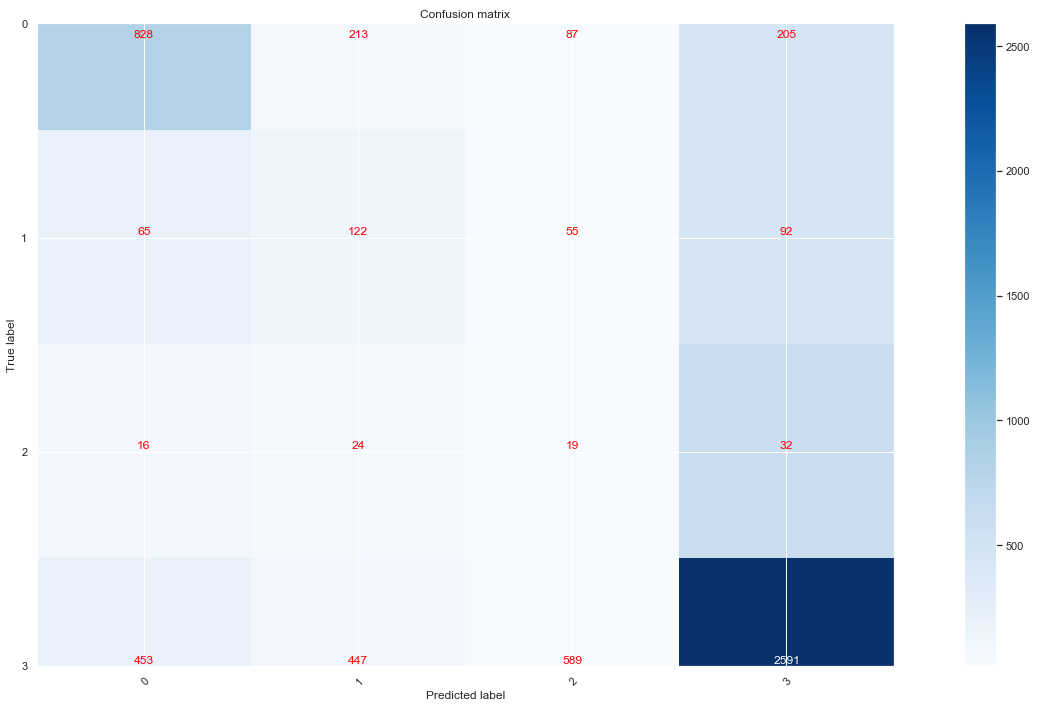

In [110]:
plot_confusion_matrix(y_validation, np.round(preds_validation).astype('int'), classes=np.array([0,1,2,3]),
                      title='Confusion matrix')

In [113]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_validation, np.round(preds_validation).astype('int')))
print("precision_score:",precision_score(y_validation, np.round(preds_validation).astype('int'), average="weighted"))
print("recall_score:",recall_score(y_validation, np.round(preds_validation).astype('int'), average="weighted"))
print("f1_score:",f1_score(y_validation, np.round(preds_validation).astype('int'), average="weighted"))

Accuracy: 0.6097978759849263
precision_score: 0.5398008278268063
recall_score: 0.6097978759849263
f1_score: 0.548979895125009


### Generate a XGBoost Classifier

In [116]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_validation, y_validation)
print('Score :{}'.format(score))
preds_validation = xgb_clf.predict(X_validation)

Score :0.6127098321342925


Confusion matrix, without normalization
[[ 856   43    0  463]
 [ 245   81    0  480]
 [  98   40    0  612]
 [ 233   47    0 2640]]


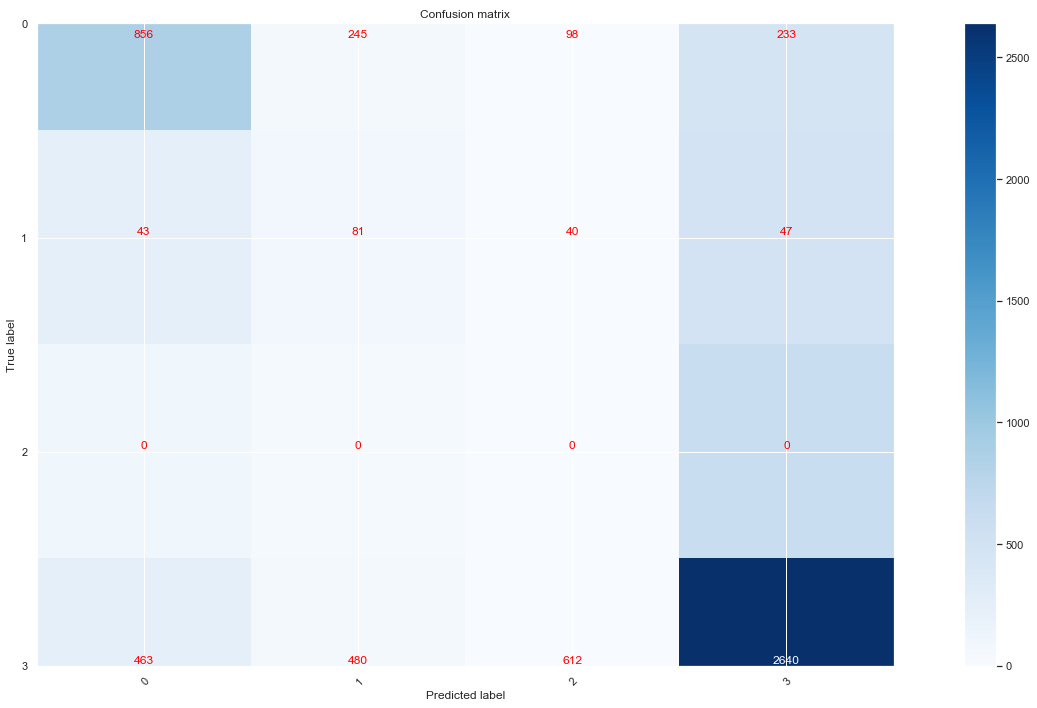

In [118]:
plot_confusion_matrix(y_validation, np.round(preds_validation).astype('int'), classes=np.array([0,1,2,3]),
                      title='Confusion matrix')

In [117]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_validation, np.round(preds_validation).astype('int')))
print("precision_score:",precision_score(y_validation, np.round(preds_validation).astype('int'), average="weighted"))
print("recall_score:",recall_score(y_validation, np.round(preds_validation).astype('int'), average="weighted"))
print("f1_score:",f1_score(y_validation, np.round(preds_validation).astype('int'), average="weighted"))

Accuracy: 0.6127098321342925


C:\Users\rkrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.



precision_score: 0.5072259261098709
recall_score: 0.6127098321342925


C:\Users\rkrishnan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



f1_score: 0.5361182585283416


## Test Submission for Kaggle

In [97]:
new_test = []
for ins_id, user_sample in tqdm(df_test.groupby('installation_id', sort=False), total=1000):
    a = get_data(user_sample, test_set=True)
    new_test.append(a)
    
X_test = pd.DataFrame(new_test)
del df_test

In [ ]:
preds = clf.predict(X_test)
del X_test

In [ ]:
submission_df['accuracy_group'] = np.round(preds).astype('int')
submission_df.to_csv('submission.csv', index=None)
submission_df.head()